In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold



In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# load dataset

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv('../../data/modeling_data/well_exposure/well_exposure_modeling_dataset.csv', index_col=0)

df['distance_ds_to_well'] = df['distance_ds_to_well']*100000
df.head()

,RTN,date_sampled_well,sample_id_x,lab_x,Matrix_x,lat_x,lon_x,NEtFOSAA_well,PFBS_well,PFDA_well,PFDoA_well,PFHpA_well,PFHxA_well,PFHxS_well,PFNA_well,PFOA_well,PFOS_well,PFTA_well,PFTrDA_well,PFUnA_well,elevation_well,MUSYM_well,BROCKDEPMI_well,WTDEPANNMI_well,FLODFREQDC_well,FLODFREQMA_well,PONDFREQPR_well,DRCLASSDCD_well,DRCLASSWET_well,HYDGRPDCD_well,SLOPE_well,SLOPEGRADD_well,SLOPEGRADW_well,map_unit_groups_well,slope_phase_well,primary_series_well,secondary_series_well,tertiary_series_well,primary_texture_well,secondary_texture_well,tertiary_texture_well,extra_desc_well,slope_aspect_well,level_0_DS,index_DS,report,lab_y,sample_id_y,Matrix_y,date_sampled_ds,lat_y,lon_y,NEtFOSAA_DS,PFBS_DS,PFDA_DS,PFDoA_DS,PFHpA_DS,PFHxA_DS,PFHxS_DS,PFNA_DS,PFOA_DS,PFOS_DS,PFTA_DS,PFTrDA_DS,PFUnA_DS,elevation_ds,MUSYM_ds,BROCKDEPMI_ds,WTDEPANNMI_ds,FLODFREQDC_ds,FLODFREQMA_ds,PONDFREQPR_ds,DRCLASSDCD_ds,DRCLASSWET_ds,HYDGRPDCD_ds,SLOPE_ds,SLOPEGRADD_ds,SLOPEGRADW_ds,map_unit_groups_ds,slope_phase_ds,primary_series_ds,secondary_series_ds,tertiary_series_ds,primary_texture_ds,secondary_texture_ds,tertiary_texture_ds,extra_desc_ds,slope_aspect_ds,elevation_ds_to_well,Notif_Date,days_since_release,distance_ds_to_well,bearing_ds_to_well
0,2-0020439,2019-07-30 00:00:00,107-WP,SGS,DW - Drinking Water,42.386142,-71.484495,0.915,0.721537,0.95,1.9,8.130000,12.000000,7.310000,0.428972,8.160000,8.570000,0.355,0.355,1.9,64,259B,NaN,NaN,None,None,0-14%,Excessively drained,Excessively drained,A,B,6.0,6.0,Excessively drained to somewhat poorly drained...,3 to 8 percent slopes,carver,NaN,NaN,loamy coarse sand,NaN,NaN,NaN,0.000000,1,0,2-0020439 - Hudson - Document_ID_481458 MW.pdf,Alpha,Z2-6-10032018,Water,2018-10-03 15:30:00,42.385469,-71.495563,0.258,72.5,0.296,0.298,81.7,0.121,2.04,45.1,1150.0,4.02,0.19875,0.2335,0.197,69,256A,NaN,69.0,None,None,0-14%,Moderately well drained,Moderately well drained,B,A,2.0,2.0,Excessively drained to somewhat poorly drained...,0 to 3 percent slopes,deerfield,NaN,NaN,loamy sand,NaN,NaN,NaN,0.0,5,2018-01-24 00:00:00,552.0,12.295282,85.295672
1,2-0020439,2019-07-30 00:00:00,115-WP,SGS,DW - Drinking Water,42.385724,-71.484219,0.915,0.874766,0.95,1.9,0.712951,0.717705,0.396204,0.519959,1.482269,1.573774,0.355,0.355,1.9,64,259B,NaN,NaN,None,None,0-14%,Excessively drained,Excessively drained,A,B,6.0,6.0,Excessively drained to somewhat poorly drained...,3 to 8 percent slopes,carver,NaN,NaN,loamy coarse sand,NaN,NaN,NaN,225.000000,1,0,2-0020439 - Hudson - Document_ID_481458 MW.pdf,Alpha,Z2-6-10032018,Water,2018-10-03 15:30:00,42.385469,-71.495563,0.258,72.5,0.296,0.298,81.7,0.121,2.04,45.1,1150.0,4.02,0.19875,0.2335,0.197,69,256A,NaN,69.0,None,None,0-14%,Moderately well drained,Moderately well drained,B,A,2.0,2.0,Excessively drained to somewhat poorly drained...,0 to 3 percent slopes,deerfield,NaN,NaN,loamy sand,NaN,NaN,NaN,0.0,5,2018-01-24 00:00:00,552.0,12.874608,88.258785
2,2-0020439,2019-07-30 00:00:00,159-WP,SGS,DW - Drinking Water,42.383074,-71.484603,0.915,2.960000,0.95,1.9,0.853082,0.128192,0.307025,0.457318,5.780000,1.205551,0.355,0.355,1.9,66,255B,NaN,NaN,None,None,0-14%,Excessively drained,Excessively drained,A,B,6.0,6.0,Excessively drained to somewhat poorly drained...,3 to 8 percent slopes,windsor,NaN,NaN,loamy sand,NaN,NaN,NaN,18.434952,1,0,2-0020439 - Hudson - Document_ID_481458 MW.pdf,Alpha,Z2-6-10032018,Water,2018-10-03 15:30:00,42.385469,-71.495563,0.258,72.5,0.296,0.298,81.7,0.121,2.04,45.1,1150.0,4.02,0.19875,0.2335,0.197,69,256A,NaN,69.0,None,None,0-14%,Moderately well drained,Moderately well drained,B,A,2.0,2.0,Excessively drained to somewhat poorly drained...,0 to 3 percent slopes,deerfield,NaN,NaN,loamy sand,NaN,NaN,NaN,0.0,3,2018-01-24 00:00:00,552.0,12.585147,106.477891
3,2-0020439,2019-07-30 00:00:00,169-WP,SGS,DW - Drinking Water,42.382688,-71.484680,0.915,5.150000,1.00,2.0,0.128218,7.570000,0.077860,0.077902,3.860000,0.290724,0.355,0.355,2.0,66,255A,NaN,NaN,None,None,0-14%,Excessively drained,Excessivel

In [5]:
RTN_list = list(df['RTN'].unique())
feature_list = [

              'elevation_well',
              'BROCKDEPMI_well',
              'WTDEPANNMI_well',
              'FLODFREQDC_well',
              'FLODFREQMA_well',
              'PONDFREQPR_well',
              'DRCLASSDCD_well',
              'DRCLASSWET_well',
              'HYDGRPDCD_well',
              'SLOPE_well',
              'SLOPEGRADD_well',
              'SLOPEGRADW_well',
              'map_unit_groups_well',
              'slope_phase_well',
              'primary_series_well',
              'secondary_series_well',
              'tertiary_series_well',
              'primary_texture_well',
              'secondary_texture_well',
              'tertiary_texture_well',
              'extra_desc_well',
              'slope_aspect_well',
              'elevation_ds',
              'BROCKDEPMI_ds',
              'WTDEPANNMI_ds',
              'FLODFREQDC_ds',
              'FLODFREQMA_ds',
              'PONDFREQPR_ds',
              'DRCLASSDCD_ds',
              'DRCLASSWET_ds',
              'HYDGRPDCD_ds',
              'SLOPE_ds',
              'SLOPEGRADD_ds',
              'SLOPEGRADW_ds',
              'map_unit_groups_ds',
              'slope_phase_ds',
              'primary_series_ds',
              'secondary_series_ds',
              'tertiary_series_ds',
              'primary_texture_ds',
              'secondary_texture_ds',
              'tertiary_texture_ds',
              'extra_desc_ds',
              'slope_aspect_ds',
              'elevation_ds_to_well',
              'days_since_release',
              'distance_ds_to_well',
              'bearing_ds_to_well']

well_response_list = [
                      # '11Cl-PF 3OUdS_well',
                      # '9Cl-PF 3ONS_well',
                      # 'ADONA_well',
                      # 'HFPO-DA_well',
                      'NEtFOSAA_well',
                      # 'NMeFOSAA_well',
                      'PFBS_well',
                      'PFDA_well',
                      'PFDoA_well',
                      'PFHpA_well',
                      'PFHxA_well',
                      'PFHxS_well',
                      'PFNA_well',
                      'PFOA_well',
                      'PFOS_well',
                      'PFTA_well',
                      'PFTrDA_well',
                      'PFUnA_well']

DS_response_list = [
                    # '11Cl-PF 3OUdS_DS',
                    # '9Cl-PF 3ONS_DS',
                    # 'ADONA_DS',
                    # 'HFPO-DA_DS',
                    'NEtFOSAA_DS',
                    # 'NMeFOSAA_DS',
                    'PFBS_DS',
                    'PFDA_DS',
                    'PFDoA_DS',
                    'PFHpA_DS',
                    'PFHxA_DS',
                    'PFHxS_DS',
                    'PFNA_DS',
                    'PFOA_DS',
                    'PFOS_DS',
                    'PFTA_DS',
                    'PFTrDA_DS',
                    'PFUnA_DS']

DS_response_list_pfas6 = [

                    #'PFBS_DS',
                    'PFDA_DS',
                    #'PFDoA_DS',
                    'PFHpA_DS',
                    #'PFHxA_DS',
                    'PFHxS_DS',
                    'PFNA_DS',
                    'PFOA_DS',
                    'PFOS_DS']
                    #'PFTA_DS',
                    #'PFTrDA_DS',
                    #'PFUnA_DS'

                                        
                    


In [6]:
regulated=[ 'PFDA_well',  'PFHpA_well', 'PFHxS_well',
            'PFNA_well', 'PFOA_well', 'PFOS_well', ]

unregulated=[
        '11Cl-PF 3OUdS_well','9Cl-PF 3ONS_well',
        'ADONA_well','HFPO-DA_well','NEtFOSAA_well',
        'NMeFOSAA_well','PFBS_well','PFDoA_well',
        'PFHxA_well','PFTA_well','PFTrDA_well','PFUnA_well',
      ]


In [7]:
# drop features containing all NaN values
nan_list = list(df.columns[list(df.isna().sum()==df.shape[0])])

feature_list = [x for x in feature_list if x not in nan_list]
df_features = df[feature_list].copy()

In [8]:

# impute mean for negative days_since_release variable cases

df_features['RTN'] = df['RTN']

for rtn in RTN_list:
  df_features.loc[(df_features['RTN']==rtn) & (df_features['days_since_release'] < 0), 'days_since_release'] = np.NaN
  rtn_mean = df_features.loc[df_features['RTN'] == rtn, 'days_since_release'].mean()
  df_features.loc[(df_features['RTN']==rtn) & (pd.isna(df_features['days_since_release'])), 'days_since_release'] = rtn_mean



In [9]:

categorical_features = list(df_features[feature_list].columns[df_features[feature_list].dtypes=='object'])
numeric_features = list(df_features[feature_list].columns[(df_features[feature_list].dtypes=='float') | (df_features[feature_list].dtypes=='int')])


In [10]:
print(len(categorical_features))
len(numeric_features)

25


11

In [11]:
numeric_features

['WTDEPANNMI_well',
 'SLOPEGRADD_well',
 'SLOPEGRADW_well',
 'slope_aspect_well',
 'WTDEPANNMI_ds',
 'SLOPEGRADD_ds',
 'SLOPEGRADW_ds',
 'slope_aspect_ds',
 'days_since_release',
 'distance_ds_to_well',
 'bearing_ds_to_well']

In [12]:

# impute feature NaNs with mean of RTN if numeric variable
for feature in numeric_features:
  for rtn in RTN_list:
    rtn_mean = df_features.loc[df_features['RTN'] == rtn, feature].mean(skipna=True)

    # use overall mean if all NaN for an RTN
    if np.isnan(rtn_mean):
        rtn_mean = df_features[feature].mean(skipna=True)

    df_features.loc[(df_features['RTN']==rtn) & (pd.isna(df_features[feature])), feature] = rtn_mean



In [13]:
for feature in categorical_features:
    df_features[feature] = df_features[feature].astype('category').astype('str')
    

In [15]:
DS_responses = df[DS_response_list].copy()
# one hot encode categorical features
df_features.drop('RTN', axis=1, inplace=True)
df_features = pd.get_dummies(df_features, columns=categorical_features, prefix=categorical_features, drop_first=True)


In [16]:
# Remove features with low variance
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=.8 * (1 - .8)):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select

keep_features = fs_variance(df_features)

print('num original features:',df.shape[1])
print('num selected features:',len(keep_features))

df_features = df_features[keep_features]


num original features: 93
num selected features: 32


In [18]:
seed=42
threshold=20
df.loc[df[well_response_list].sum(axis=1)>=threshold, 'response_all'] = 1
df.loc[df[well_response_list].sum(axis=1)<threshold, 'response_all'] = 0

regulated=[ 'PFDA_well',  'PFHpA_well', 'PFHxS_well',
            'PFNA_well', 'PFOA_well', 'PFOS_well', ]

df.loc[df[regulated].sum(axis=1)>=threshold, 'response_PFAS6'] = 1
df.loc[df[regulated].sum(axis=1)<threshold, 'response_PFAS6'] = 0
df['response_PFAS6'].value_counts()        

#ONLY PFAS 6 for both DS and well
X = pd.concat((df_features, DS_responses[DS_response_list_pfas6]), axis=1)
y = df['response_PFAS6']

Xy = pd.concat((X,y),axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=seed,
                                                    train_size=.80)
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Classification Model

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis


k_folds = 10
n_repeats = 10
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
model_list = [
    LogisticRegression(random_state=seed,max_iter=1000),
              KNeighborsClassifier(),
              RandomForestClassifier(random_state=seed),
              ]

params = [


       
                    #LogisticRegression
                    {'penalty': ['l1', 'l2','elasticnet',None],
                    'C': (0.001,0.01,0.1,1,0.5,0.75,0.0001,2,5),
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
  
                    
                    },
                        
                    {#KNeighborsClassifier
                    'n_neighbors': [x for x in range(2,10)],
                    'weights': ['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'p': (1,2),

                    },


                    {
                    'n_estimators': [x for x in range(10,100,20)],
                    'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth': [x for x in range(1,10)],
                    'criterion': ['gini', 'entropy'],
                    'min_samples_split': [x for x in range(2,10)],
                    'min_samples_leaf': [x for x in range(1,10)],
                    'bootstrap': [True, False],
                    
                    'oob_score': [True, False],

                    },

                ]              

models=[]
results = []
results_df = pd.DataFrame()

#nca = NeighborhoodComponentsAnalysis(random_state=42,n_components=3)
#nca.fit(X_train, y_train)
#X_train = nca.transform(X_train)
#X_test = nca.transform(X_test)
for clf,param in zip(model_list,params):

    model_str = str(clf)
    rkf = RepeatedStratifiedKFold(n_splits=k_folds, 
                                  n_repeats=n_repeats,
                                  random_state=seed)
    
    model= RandomizedSearchCV(clf,param,random_state=seed,n_iter=20,n_jobs=-1,cv=rkf)
    


    cv_results = cross_validate(model, 
                                X_train, y_train, 
                                cv=rkf,
                                scoring=['accuracy','recall', 'precision', 'f1', 'roc_auc'])
    model.fit(X_train, y_train)
    models.append(model)
    y_pred = model.predict(X_test)
    #y_pred_proba = model.predict_proba(X_test)[:,1]

    print(model.best_estimator_)
    print("score:",model.score(X_test,y_test))

    results.append({'model':model.best_estimator_, 
                    'cv_accuracy':cv_results['test_accuracy'].mean(),  
                    'cv_precision':cv_results['test_precision'].mean(),                      
                    'cv_recall':cv_results['test_recall'].mean(),
                    'cv_f1':cv_results['test_f1'].mean(),
                    'cv_ROC':cv_results['test_roc_auc'].mean()})
    print("confusion matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("classification report:")
    print(classification_report(y_test,y_pred))

results_df = pd.DataFrame(results)
results_df

LogisticRegression(C=2, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
score: 0.7272727272727273
confusion matrix:
[[24  2]
 [10  8]]
classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80        26
         1.0       0.80      0.44      0.57        18

    accuracy                           0.73        44
   macro avg       0.75      0.68      0.69        44
weighted avg       0.74      0.73      0.71        44

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, p=1)
score: 0.7272727272727273
confusion matrix:
[[24  2]
 [10  8]]
classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80        26
         1.0       0.80      0.44      0.57        18

    accuracy                           0.73        44
   macro avg       0.75      0.68      0.69        44
weighted avg       0.74      0.73      0.71        44

R

,model,cv_accuracy,cv_precision,cv_recall,cv_f1,cv_ROC
0,"LogisticRegression(C=2, max_iter=1000, penalty...",0.744444,0.738028,0.596607,0.648766,0.747334
1,"KNeighborsClassifier(algorithm='ball_tree', n_...",0.766830,0.804383,0.603393,0.671978,0.808889
2,"(DecisionTreeClassifier(max_depth=7, max_featu...",0.779444,0.792492,0.646964,0.698370,0.840530


In [22]:
logistic_pred=models[0].best_estimator_.predict(ss.transform(X))
knn_pred=models[1].best_estimator_.predict(ss.transform(X))
rf_pred=models[2].best_estimator_.predict(ss.transform(X))
pred_df=X.copy(True)
pred_df['logistic_pred']=logistic_pred
pred_df['knn_pred']=knn_pred
pred_df['rf_pred']=rf_pred
pred_df['response_PFAS6']=Xy['response_PFAS6']
pred_df['RTN']=df['RTN']
pred_df['lat_x']=df['lat_x']
pred_df['lon_x']=df['lon_x']
pred_df['lat_y']=df['lat_y']
pred_df['lon_y']=df['lon_y']
pred_df.drop(df_features.columns, axis=1, inplace=True)
#pred_df.drop(numeric_features, axis=1, inplace=True)




pred_df.drop(DS_response_list_pfas6, axis=1, inplace=True)

pred_df.head()

,logistic_pred,knn_pred,rf_pred,response_PFAS6,RTN,lat_x,lon_x,lat_y,lon_y
0,0.0,0.0,0.0,1.0,2-0020439,42.386142,-71.484495,42.385469,-71.495563
1,0.0,0.0,0.0,0.0,2-0020439,42.385724,-71.484219,42.385469,-71.495563
2,0.0,0.0,0.0,0.0,2-0020439,42.383074,-71.484603,42.385469,-71.495563
3,0.0,0.0,0.0,0.0,2-0020439,42.382688,-71.484680,42.385469,-71.495563
4,0.0,0.0,0.0,0.0,2-0020439,42.381728,-71.486291,42.385469,-71.495563


LogisticRegression


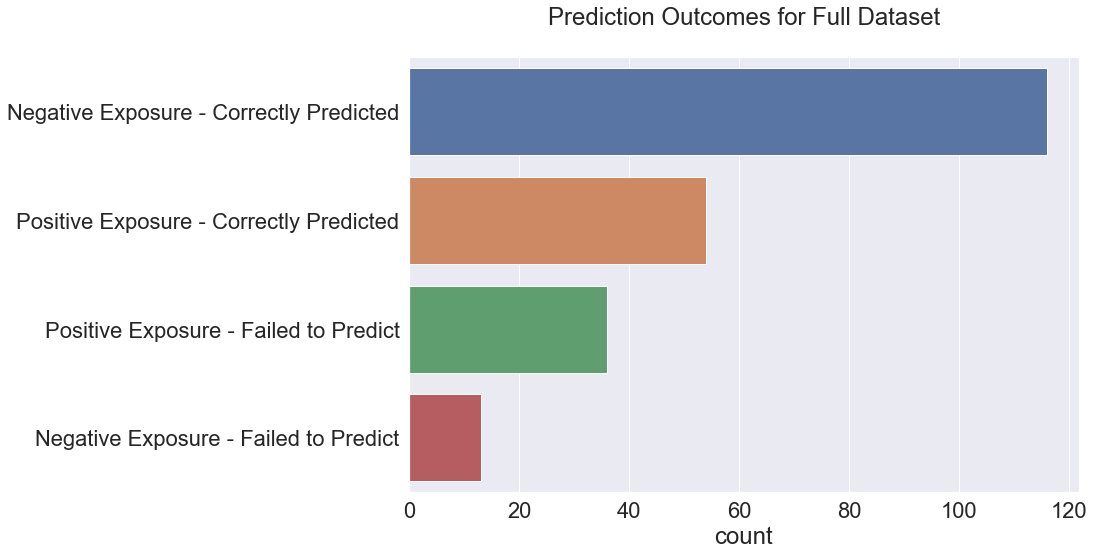

KNN


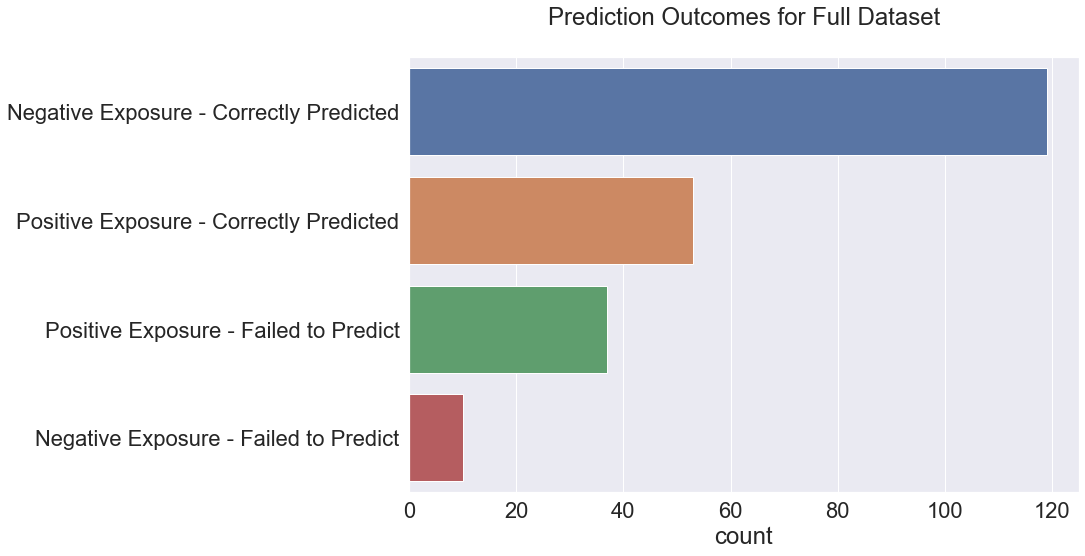

RF


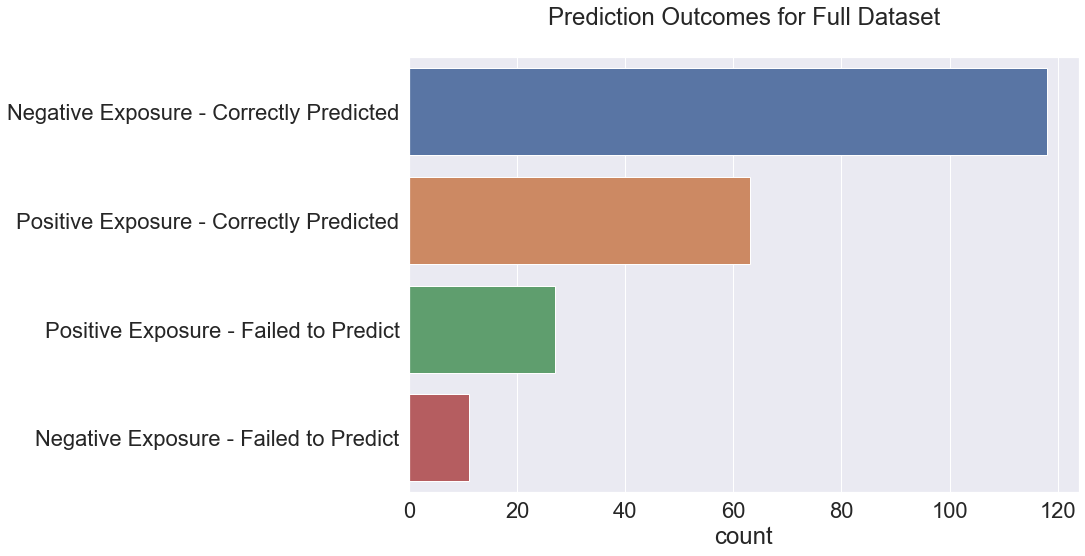

In [23]:

import seaborn as sns
# categorize prediction outcomes
print("LogisticRegression")

pred_df.loc[(pred_df['logistic_pred']==1) & (pred_df['response_PFAS6']==1), 'pred_result_logistic'] = 'True Positive'
pred_df.loc[(pred_df['logistic_pred']==0)  & (pred_df['response_PFAS6']==1), 'pred_result_logistic'] = 'False Negative'
pred_df.loc[(pred_df['logistic_pred']==1) & (pred_df['response_PFAS6']==0), 'pred_result_logistic'] = 'False Positive'
pred_df.loc[(pred_df['logistic_pred']==0)  & (pred_df['response_PFAS6']==0), 'pred_result_logistic'] = 'True Negative'
pred_df.loc[pred_df['pred_result_logistic']=='True Positive', 'pred_result_label_logistic'] = 'Positive Exposure - Correctly Predicted'
pred_df.loc[pred_df['pred_result_logistic']=='False Negative', 'pred_result_label_logistic'] = 'Positive Exposure - Failed to Predict'
pred_df.loc[pred_df['pred_result_logistic']=='False Positive', 'pred_result_label_logistic'] = 'Negative Exposure - Failed to Predict'
pred_df.loc[pred_df['pred_result_logistic']=='True Negative', 'pred_result_label_logistic'] = 'Negative Exposure - Correctly Predicted'
# plot prediction outcome totals 
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 2)
ax = sns.countplot(data=pred_df, y='pred_result_label_logistic', order=pred_df['pred_result_label_logistic'].value_counts().index)

plt.ylabel('')
plt.title('Prediction Outcomes for Full Dataset\n')
plt.show( )
print("KNN")
pred_df.loc[(pred_df['knn_pred']==1) & (pred_df['response_PFAS6']==1), 'pred_result_knn'] = 'True Positive'
pred_df.loc[(pred_df['knn_pred']==0)  & (pred_df['response_PFAS6']==1), 'pred_result_knn'] = 'False Negative'
pred_df.loc[(pred_df['knn_pred']==1) & (pred_df['response_PFAS6']==0), 'pred_result_knn'] = 'False Positive'
pred_df.loc[(pred_df['knn_pred']==0)  & (pred_df['response_PFAS6']==0), 'pred_result_knn'] = 'True Negative'
pred_df.loc[pred_df['pred_result_knn']=='True Positive', 'pred_result_label_knn'] = 'Positive Exposure - Correctly Predicted'
pred_df.loc[pred_df['pred_result_knn']=='False Negative', 'pred_result_label_knn'] = 'Positive Exposure - Failed to Predict'
pred_df.loc[pred_df['pred_result_knn']=='False Positive', 'pred_result_label_knn'] = 'Negative Exposure - Failed to Predict'
pred_df.loc[pred_df['pred_result_knn']=='True Negative', 'pred_result_label_knn'] = 'Negative Exposure - Correctly Predicted'
# plot prediction outcome totals 
ax = sns.countplot(data=pred_df, y='pred_result_label_knn', order=pred_df['pred_result_label_knn'].value_counts().index)
plt.ylabel('')
plt.title('Prediction Outcomes for Full Dataset\n')
plt.show()


print("RF")
pred_df.loc[(pred_df['rf_pred']==1) & (pred_df['response_PFAS6']==1), 'pred_result_rf'] = 'True Positive'
pred_df.loc[(pred_df['rf_pred']==0)  & (pred_df['response_PFAS6']==1), 'pred_result_rf'] = 'False Negative'
pred_df.loc[(pred_df['rf_pred']==1) & (pred_df['response_PFAS6']==0), 'pred_result_rf'] = 'False Positive'
pred_df.loc[(pred_df['rf_pred']==0)  & (pred_df['response_PFAS6']==0), 'pred_result_rf'] = 'True Negative'
pred_df.loc[pred_df['pred_result_rf']=='True Positive', 'pred_result_label_rf'] = 'Positive Exposure - Correctly Predicted'
pred_df.loc[pred_df['pred_result_rf']=='False Negative', 'pred_result_label_rf'] = 'Positive Exposure - Failed to Predict'
pred_df.loc[pred_df['pred_result_rf']=='False Positive', 'pred_result_label_rf'] = 'Negative Exposure - Failed to Predict'
pred_df.loc[pred_df['pred_result_rf']=='True Negative', 'pred_result_label_rf'] = 'Negative Exposure - Correctly Predicted'
# plot prediction outcome totals 
ax = sns.countplot(data=pred_df, y='pred_result_label_rf', order=pred_df['pred_result_label_rf'].value_counts().index)
plt.ylabel('')
plt.title('Prediction Outcomes for Full Dataset\n')
plt.show()




pred_df.to_csv('pred_df_well_exposure.csv')


In [24]:
mlist=[]
for m in models:
    mlist.append((str(m.best_estimator_),m.best_estimator_))

mlist

[("LogisticRegression(C=2, max_iter=1000, penalty='l1', random_state=42,\n                   solver='liblinear')",
  LogisticRegression(C=2, max_iter=1000, penalty='l1', random_state=42,
                     solver='liblinear')),
 ("KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, p=1)",
  KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, p=1)),
 ("RandomForestClassifier(bootstrap=False, max_depth=7, max_features='log2',\n                       min_samples_leaf=6, min_samples_split=4, n_estimators=70,\n                       random_state=42)",
  RandomForestClassifier(bootstrap=False, max_depth=7, max_features='log2',
                         min_samples_leaf=6, min_samples_split=4, n_estimators=70,
                         random_state=42))]

In [25]:
X.columns

Index(['elevation_well', 'WTDEPANNMI_well', 'SLOPEGRADD_well',
       'SLOPEGRADW_well', 'slope_aspect_well', 'elevation_ds', 'SLOPEGRADD_ds',
       'SLOPEGRADW_ds', 'slope_aspect_ds', 'elevation_ds_to_well',
       'days_since_release', 'distance_ds_to_well', 'bearing_ds_to_well',
       'DRCLASSWET_well_Well drained', 'HYDGRPDCD_well_C', 'SLOPE_well_A',
       'SLOPE_well_B',
       'map_unit_groups_well_Excessively drained to somewhat poorly drained soils formed in glacial outwash or lacustrine sediments',
       'slope_phase_well_0 to 3 percent slopes',
       'slope_phase_well_3 to 8 percent slopes',
       'primary_texture_well_loamy coarse sand',
       'DRCLASSDCD_ds_Moderately well drained',
       'DRCLASSWET_ds_Moderately well drained',
       'DRCLASSWET_ds_Somewhat excessively drained', 'HYDGRPDCD_ds_B',
       'SLOPE_ds_A', 'SLOPE_ds_B',
       'map_unit_groups_ds_Miscellaneous land types, urban land, and soils above series levels',
       'slope_phase_ds_0 to 8 percent 

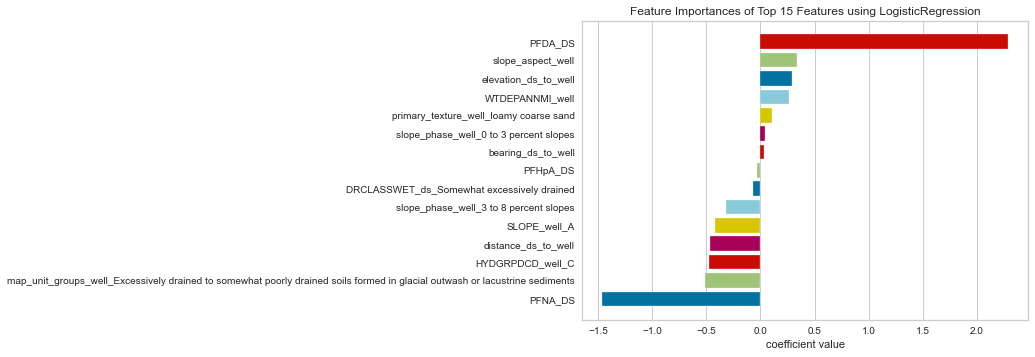

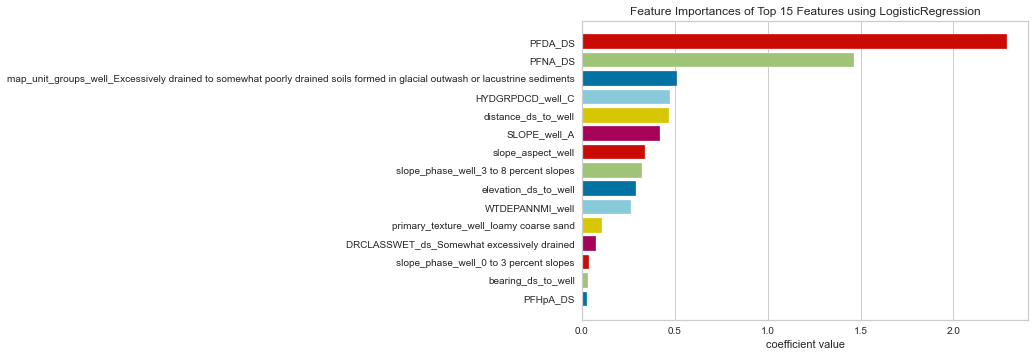

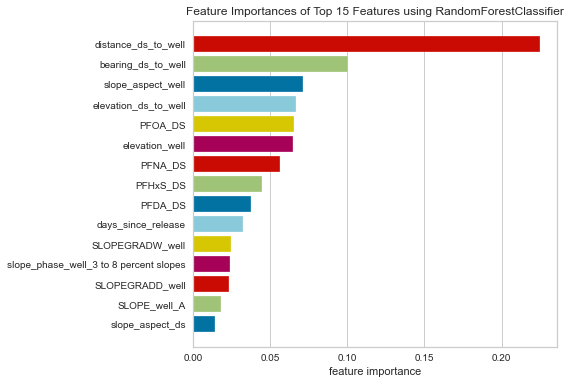

[0.0145935  0.01796236 0.0232016  0.02387479 0.0245637  0.03281343
 0.0376284  0.04479078 0.05638702 0.06507145 0.0656864  0.06667581
 0.07110126 0.10069003 0.22481785]


In [34]:
from yellowbrick.model_selection import FeatureImportances
X_train=pd.DataFrame(X_train,columns=X.columns)


viz = FeatureImportances(models[0].best_estimator_,  relative=False,topn=15)
viz.fit(X_train, y_train)
viz.show()

viz = FeatureImportances(models[0].best_estimator_,  relative=False,topn=15,absolute=True)
viz.fit(X_train, y_train)
viz.show()



viz = FeatureImportances(models[2].best_estimator_,  relative=False,topn=15)
viz.fit(X_train, y_train)
viz.show()
print(viz.feature_importances_)


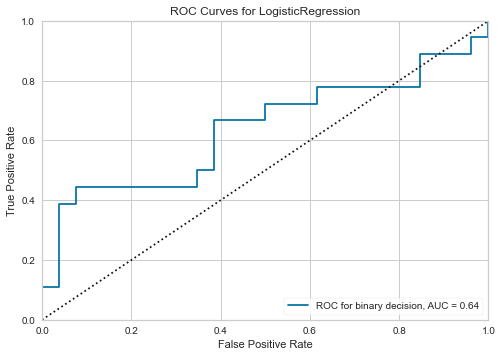

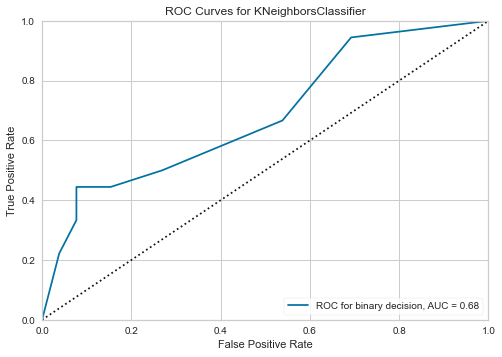

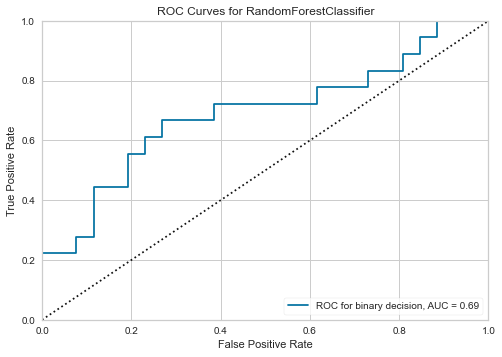

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(models[0].best_estimator_,binary=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   
visualizer = ROCAUC(models[1].best_estimator_,binary=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   


visualizer = ROCAUC(models[2].best_estimator_,binary=True)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

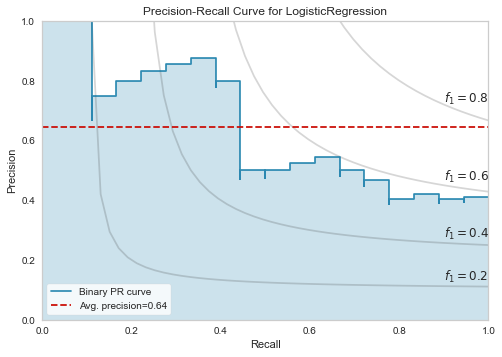

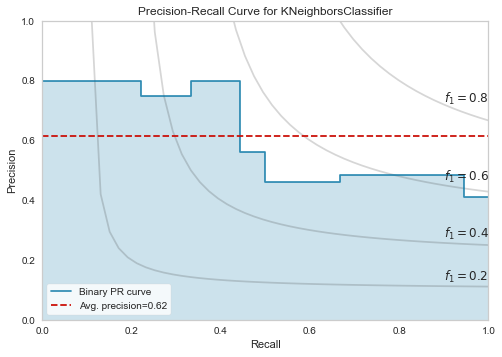

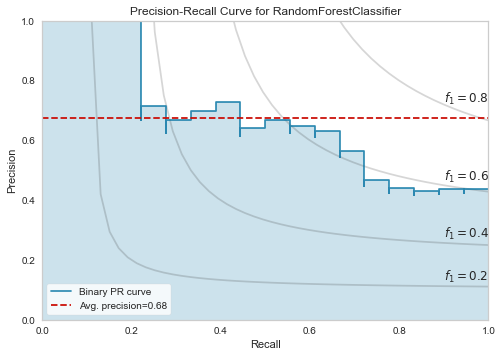

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [29]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(models[0].best_estimator_,iso_f1_curves=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
viz = PrecisionRecallCurve(models[1].best_estimator_,iso_f1_curves=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


viz = PrecisionRecallCurve(models[2].best_estimator_,iso_f1_curves=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()